### Intro and $d=2$

This is just an agglomeration of functions written in the python files.

Here we load the projections and verify that they work.

In [1]:
from RRR import *
from kissProject import *
from rankProject import *

d = 2
k = 3

#Need this to escape an awkward rut, where everything stays positive for a long time.
X = semiDefProject(np.random.rand(k, k)*2 - 1)


print X
print rankProject(X, 2, True)
print kissProject(X)
print X

[[ 0.77783078 -0.36231635 -0.07862925]
 [-0.36231635  0.83282838 -0.33979895]
 [-0.07862925 -0.33979895  0.43710464]]
[[ 0.83862107 -0.22458657 -0.29137029]
 [-0.22458657  0.68744911 -0.40549192]
 [-0.29137029 -0.40549192  0.47392982]]
[[ 1.         -0.36231635 -0.07862925]
 [-0.36231635  1.         -0.33979895]
 [-0.07862925 -0.33979895  1.        ]]
[[ 0.77783078 -0.36231635 -0.07862925]
 [-0.36231635  0.83282838 -0.33979895]
 [-0.07862925 -0.33979895  0.43710464]]


Next, we run RRR, using these projections.

In [2]:
Y, errors, sols = RRR(X, lambda x: rankProject(x, d, False), kissProject, 0.5, 0.0001, 10000, True)

It works.

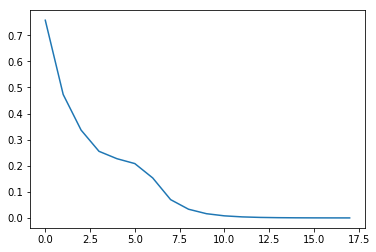

[[ 0.77783078 -0.36231635 -0.07862925]
 [-0.36231635  0.83282838 -0.33979895]
 [-0.07862925 -0.33979895  0.43710464]]
[[ 0.88708227 -0.6129069  -0.61288803]
 [-0.6129069   0.88709973 -0.61290587]
 [-0.61288803 -0.61290587  0.88708125]]
[[ 1.  -0.5 -0.5]
 [-0.5  1.  -0.5]
 [-0.5 -0.5  1. ]]
[[ 0.99998652 -0.50000263 -0.49998379]
 [-0.50000263  1.00000402 -0.5000016 ]
 [-0.49998379 -0.5000016   0.99998549]]
(array([  1.32473870e-17,   1.49996977e+00,   1.50000626e+00]), array([[ 0.57735023, -0.69697161, -0.42532021],
       [ 0.57735035, -0.01985225,  0.81625515],
       [ 0.57735023,  0.71682387, -0.3909351 ]]))


In [3]:
plt.plot(errors)
plt.show()
print X
print Y
print kissProject(Y)
print sols

print eig(sols)

Clearly, we care about the eigenvectors that aren't nearly 0, so we se

In [4]:
centers = eig(sols)[1][:, 1:]
centers = centers/norm(centers[0])
print centers[0]
print centers[1]
print centers[2]

[-0.85361238 -0.52090873]
[-0.02431394  0.99970427]
[ 0.87792633 -0.47879575]


In [5]:
print norm(centers[0])
print np.matmul(centers, centers.transpose())
print np.round(sols, 4)

1.0
[[ 1.         -0.5        -0.4999999 ]
 [-0.5         0.99999979 -0.5       ]
 [-0.4999999  -0.5         1.        ]]
[[ 1.  -0.5 -0.5]
 [-0.5  1.  -0.5]
 [-0.5 -0.5  1. ]]


Fantastic! We've solved something very, very easy. Now, let's try 3 dimensions.

### $d=3$

In [6]:
d = 3
k = 6
X = semiDefProject(np.random.rand(k, k)*2 - 1)

Y, errors, sols = RRR(X, lambda x: rankProject(x, d, False), kissProject, 0.5, 1e-8, 10000, True)

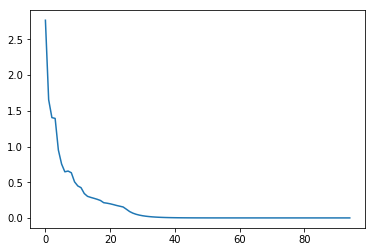

[[ 0.67316197 -0.51332833  0.44356773 -0.00093454  0.61600992 -0.03119004]
 [-0.51332833 -0.39440568  0.14693265  0.03670732 -0.18725171  0.20433751]
 [ 0.44356773  0.14693265  0.37246888  0.17096014  0.24312306 -0.80353696]
 [-0.00093454  0.03670732  0.17096014 -0.3034336  -0.15410144  0.12183745]
 [ 0.61600992 -0.18725171  0.24312306 -0.15410144 -0.57665815 -0.17833585]
 [-0.03119004  0.20433751 -0.80353696  0.12183745 -0.17833585  0.62977196]]
[[ 1.         -0.43201316  0.45386853  0.449514   -0.45283408 -0.45902241]
 [-0.43201316  1.          0.45438449  0.45278221  0.44673935  0.43955121]
 [ 0.45386853  0.45438449  1.          0.442897    0.43850642 -0.45872429]
 [ 0.449514    0.45278221  0.442897    1.         -0.45464731  0.436495  ]
 [-0.45283408  0.44673935  0.43850642 -0.45464731  1.         -0.43523898]
 [-0.45902241  0.43955121 -0.45872429  0.436495   -0.43523898  1.        ]]
[[ 1.         -0.43201316  0.45386853  0.449514   -0.45283408 -0.45902241]
 [-0.43201316  1.      

In [7]:
plt.plot(errors)
plt.show()
print X
print Y
print kissProject(Y)
print sols

print eig(sols)

Clearly, we only care about the first 3 eigenvectors.

In [8]:
centers = eig(sols)[1][:, :3]
centers = centers/norm(centers[0])
print norm(centers[5])

1.00404167153


In [9]:
print centers
print np.real(np.round(np.matmul(centers, centers.transpose()), 6))
print np.round(sols, 6)

[[ 0.83712613 -0.48293668  0.25688909]
 [ 0.09105136  0.66531127 -0.74757174]
 [ 0.85100996  0.52298346 -0.0427572 ]
 [ 0.62548823 -0.23726924 -0.74664422]
 [-0.06283193  0.96985033  0.25325087]
 [-0.42651232 -0.25317901 -0.87297612]]
[[ 1.       -0.437125  0.448851  0.446394 -0.455917 -0.459033]
 [-0.437125  1.009793  0.457396  0.457264  0.450208  0.445335]
 [ 0.448851  0.457396  0.999558  0.440133  0.442917 -0.458049]
 [ 0.446394  0.457264  0.440133  1.00501  -0.458505  0.445096]
 [-0.455917  0.450208  0.442917 -0.458505  1.008694 -0.439829]
 [-0.459033  0.445335 -0.458049  0.445096 -0.439829  1.0081  ]]
[[ 1.       -0.432013  0.453869  0.449514 -0.452834 -0.459022]
 [-0.432013  1.        0.454384  0.452782  0.446739  0.439551]
 [ 0.453869  0.454384  1.        0.442897  0.438506 -0.458724]
 [ 0.449514  0.452782  0.442897  1.       -0.454647  0.436495]
 [-0.452834  0.446739  0.438506 -0.454647  1.       -0.435239]
 [-0.459022  0.439551 -0.458724  0.436495 -0.435239  1.      ]]


So far, so good.

Now, we go on to dimension $4$.

### $d = 4$

In [10]:
d = 4
k = 12

X = semiDefProject(np.random.rand(k, k)*2 - 1)

Y, errors, sols = RRR(X, lambda x: rankProject(x, d, False), kissProject, 0.5, 1e-8, 10000, True)

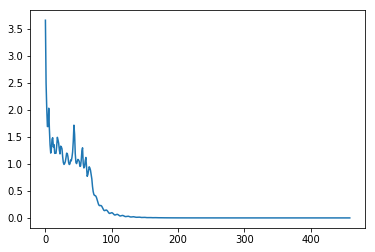

[[ 1.  -0.5 -0.5 -0.5  0.  -0.  -0.5 -0.5 -0.  -0.5 -0.5 -0.5]
 [-0.5  1.   0.   0.5 -0.5  0.5  0.5 -0.  -0.5  0.5 -0.5  0. ]
 [-0.5  0.   1.  -0.5 -0.5 -0.5  0.5 -0.   0.5  0.5  0.5  0. ]
 [-0.5  0.5 -0.5  1.   0.5  0.5 -0.   0.5 -0.5  0.   0.   0.5]
 [ 0.  -0.5 -0.5  0.5  1.   0.  -0.5  0.5 -0.  -0.5  0.5  0.5]
 [-0.   0.5 -0.5  0.5  0.   1.   0.5  0.5 -0.  -0.5 -0.5 -0.5]
 [-0.5  0.5  0.5 -0.  -0.5  0.5  1.   0.5  0.5 -0.  -0.  -0.5]
 [-0.5 -0.  -0.   0.5  0.5  0.5  0.5  1.   0.5 -0.5  0.5 -0. ]
 [-0.  -0.5  0.5 -0.5 -0.  -0.   0.5  0.5  1.  -0.5  0.5 -0.5]
 [-0.5  0.5  0.5  0.  -0.5 -0.5 -0.  -0.5 -0.5  1.   0.   0.5]
 [-0.5 -0.5  0.5  0.   0.5 -0.5 -0.   0.5  0.5  0.   1.   0.5]
 [-0.5  0.   0.   0.5  0.5 -0.5 -0.5 -0.  -0.5  0.5  0.5  1. ]]
[-0.+0.j  0.+0.j  0.+0.j  3.+0.j  3.+0.j  3.+0.j  3.+0.j -0.+0.j -0.-0.j
  0.+0.j  0.+0.j  0.-0.j]


In [11]:
plt.plot(errors)
plt.show()
#print X
#print Y
#print kissProject(Y)
print np.round(sols, 6)

print np.round(eig(sols)[0], 6)

From the eigenvalues, we know that we only care about columns 3, 4, 5, 6 (counting from 0); they will give the 4 coordinates of the centers.

Also, notice how all of the dot products are rational numbers.

In [12]:
centers = eig(sols)[1][:, 3:7]
centers = centers/norm(centers[0])

print np.round(centers, 6)
print np.real(np.round(np.matmul(centers, centers.transpose()), 4))
print np.round(sols, 6)



[[ 0.636745+0.j  0.688538+0.j -0.332652+0.j  0.099066+0.j]
 [ 0.146195+0.j -0.735970+0.j  0.413222+0.j  0.515963+0.j]
 [-0.440691+0.j  0.126425+0.j  0.817202+0.j -0.349281+0.j]
 [-0.196054+0.j -0.814964+0.j -0.484551+0.j  0.250215+0.j]
 [-0.342249+0.j -0.078993+0.j -0.897772+0.j -0.265748+0.j]
 [-0.097200+0.j -0.159342+0.j -0.231547+0.j  0.954752+0.j]
 [-0.537890+0.j -0.032916+0.j  0.585655+0.j  0.605471+0.j]
 [-0.880140+0.j -0.111910+0.j -0.312117+0.j  0.339724+0.j]
 [-0.684086+0.j  0.703054+0.j  0.172434+0.j  0.089509+0.j]
 [ 0.243395+0.j -0.576629+0.j  0.644769+0.j -0.438789+0.j]
 [-0.782940+0.j  0.047432+0.j -0.080570+0.j -0.615029+0.j]
 [-0.098854+0.j -0.655622+0.j -0.253004+0.j -0.704537+0.j]]
[[ 1.  -0.5 -0.5 -0.5  0.   0.  -0.5 -0.5 -0.  -0.5 -0.5 -0.5]
 [-0.5  1.  -0.   0.5 -0.5  0.5  0.5  0.  -0.5  0.5 -0.5  0. ]
 [-0.5 -0.   1.  -0.5 -0.5 -0.5  0.5 -0.   0.5  0.5  0.5  0. ]
 [-0.5  0.5 -0.5  1.   0.5  0.5 -0.   0.5 -0.5 -0.  -0.   0.5]
 [ 0.  -0.5 -0.5  0.5  1.   0.  -0.5  0

To the significant digits, the solutions and the dot products line up.

Also, those are the 4D coordinates of 12 valid centers. The other 12 can be obtained by looking at -centers, of course.



### Special adjustments for $d = 5$ 

We move on to $d = 5$ and $k = 18$, to warm up.

In [13]:
d = 5
k = 18

X = semiDefProject(np.random.rand(k, k) - 0.5)

Y, errors, sols = RRR(X, lambda x: rankProject(x, d, False), kissProject, 0.5, 1e-8, 10000, True)

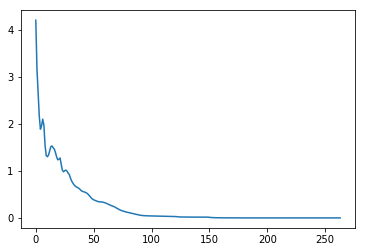

In [14]:
plt.plot(errors)
plt.show()

In [15]:
a =  np.real(np.round(sols, 6))
a = a/a[0, 0]
print np.round(a, 6)

[[ 1.        0.323714 -0.488089  0.014521  0.45488  -0.487327  0.325084
   0.198807 -0.271484  0.423389  0.331955  0.499695 -0.468842 -0.497691
   0.212577 -0.49859  -0.034355  0.479852]
 [ 0.323714  1.       -0.48005   0.498286 -0.423733 -0.494368  0.285614
  -0.21923   0.19421  -0.499752  0.229987 -0.412388 -0.495693  0.039445
   0.36524   0.04417   0.498471  0.495487]
 [-0.488089 -0.48005   1.       -0.478461  0.477784  0.222812 -0.487246
  -0.489969  0.485061 -0.356329  0.467324 -0.073812  0.250831  0.151379
  -0.490999  0.095882 -0.474801  0.117698]
 [ 0.014521  0.498286 -0.478461  1.       -0.492111 -0.498545  0.483854
  -0.468583 -0.456998 -0.050976 -0.378123 -0.498001  0.459094  0.497515
   0.054207 -0.491933  0.031229  0.088336]
 [ 0.45488  -0.423733  0.477784 -0.492111  1.       -0.00209   0.0231
  -0.144534  0.124652  0.393079  0.497877  0.430076 -0.011291 -0.49009
  -0.498038 -0.491939 -0.482663  0.485751]
 [-0.487327 -0.494368  0.222812 -0.498545 -0.00209   1.        0.160

So far, so good.

For $k = 20$, the algorithm will need to thrash for a little longer, and take smaller steps.

However, everything works out.

In [39]:
d = 5
k = 20
X = semiDefProject(2*np.random.rand(k, k) - 1.0)

Y, errors, sols = RRR(X, lambda x: rankProject(x, d, False), kissProject, 0.01, 1e-8, 10000000, True)

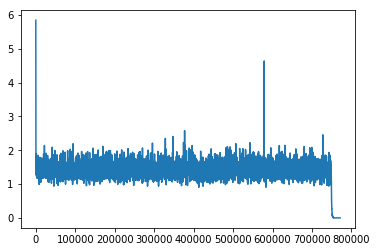

[-0.+0.j  0.+0.j  0.+0.j  4.+0.j  4.+0.j  4.+0.j  4.+0.j  4.+0.j -0.+0.j
 -0.+0.j -0.-0.j  0.+0.j  0.-0.j  0.+0.j  0.-0.j -0.+0.j -0.-0.j  0.+0.j
  0.-0.j  0.+0.j]


In [40]:
plt.plot(errors)
plt.show()

print np.round(eig(sols)[0], 6)


In [46]:
centers = eig(sols)[1][:, 3:8]
centers = centers/norm(centers[0])

print np.round(centers, 4)
#print np.real(np.round(np.matmul(centers, centers.transpose()), 3))
print np.round(sols, 3)


print np.all(np.round(np.matmul(centers, centers.transpose()), 3) == np.round(sols, 3))

[[-0.4344+0.j -0.6058+0.j -0.1540+0.j -0.5157+0.j -0.3932+0.j]
 [ 0.8079+0.j  0.1412+0.j -0.1478+0.j  0.4310+0.j -0.3459+0.j]
 [ 0.7043+0.j -0.6466+0.j  0.2674+0.j  0.1142+0.j -0.0363+0.j]
 [ 0.7818+0.j  0.2645+0.j  0.5331+0.j -0.1834+0.j  0.0322+0.j]
 [-0.0261+0.j  0.1233+0.j  0.6809+0.j -0.6144+0.j  0.3782+0.j]
 [ 0.3307+0.j -0.1820+0.j  0.5691+0.j  0.1989+0.j  0.7028+0.j]
 [ 0.0775+0.j  0.9111+0.j  0.2657+0.j -0.2976+0.j  0.0685+0.j]
 [-0.2441+0.j  0.0922+0.j  0.5641+0.j  0.7631+0.j  0.1774+0.j]
 [ 0.6010+0.j -0.3975+0.j -0.6758+0.j  0.0503+0.j  0.1473+0.j]
 [ 0.6784+0.j  0.5136+0.j -0.4101+0.j -0.2474+0.j  0.2158+0.j]
 [-0.1034+0.j  0.2491+0.j -0.9431+0.j -0.0639+0.j  0.1836+0.j]
 [ 0.3474+0.j -0.3413+0.j  0.3791+0.j -0.6992+0.j -0.3610+0.j]
 [-0.1036+0.j -0.7878+0.j  0.4151+0.j -0.3168+0.j  0.3096+0.j]
 [-0.3569+0.j  0.3053+0.j  0.1117+0.j -0.8134+0.j -0.3247+0.j]
 [ 0.2274+0.j  0.0671+0.j -0.3740+0.j  0.1350+0.j  0.8864+0.j]
 [-0.4511+0.j -0.4465+0.j  0.0361+0.j  0.3824+0.j  0.67

### In conclusion

Everything worked out, at $d = 2, 3, 4, 5$.

Notice that the centers we found really did generate the $X$ computed by RRR, as demonstrated by the "True" we printed.